Теперь попробуем реализовать классификацию и вычислить разобранные метрики.
Для начала подгружаем библиотеки:

In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:



In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

Теперь зададим зависимую и независимые переменные:



In [3]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:



In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Готово! Теперь осталось только вычислить необходимые метрики:



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9415204678362573
0.9396551724137931
0.9732142857142857
0.9561403508771931


### Задание 3B.2.1
Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.  
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.  
Найдите метрику $Accuracy$ .  
Ответ округлите до сотых. Пример ввода: 5.55.

In [6]:
accuracy = (6+14)/(15+20)
round(accuracy,2)

0.57

### Задание 3B2.2
Загрузите встроенный в библиотеку `sklearn` датасет про ирисы с помощью функции `load_iris`. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики $Accuracy$.  
Ответ округлите до сотых. Пример ввода: 5.55.

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(round(accuracy_score(y_pred, y_test),2))

0.91


## 3B.3. Классификация. Практика
У вас есть датасет с параметрами мобильных телефонов. Переменная `price_range` отвечает за то, к какой категории относится телефон: 1 — дорогие, 0 — дешевые.  
Ваша задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.

In [10]:
import pandas as pd

In [11]:
data = pd.read_csv('./Unit_5_data/train_mobile.csv', sep =';')

### Шаг 1
Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.

### Задание 3B.3.1 Отбор признаков
Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции). Отметьте отобранные признаки:

In [12]:
for feat in abs(data.corr().price_range).sort_values(ascending=False).index.drop('price_range')[:5]: print (feat)

ram
battery_power
px_width
px_height
touch_screen


### ШАГ 2
Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте `0.2`. Параметр `random_state=31`. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

### Задание 3B.3.2 Выбор метрики

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

data = pd.read_csv('./Unit_5_data/train_mobile.csv', sep =';')

columns_to_fit = abs(data.corr().price_range).sort_values(ascending=False).index[1:6]

y = data.price_range
X = data[columns_to_fit]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)

model = LogisticRegression(random_state=31)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test,y_pred)
round(precision,4)

0.9716

### 3B.3.3 Значение метрики
Введите полученное значение, округлите до четырех знаков после запятой. Целую и десятичную часть разделите точкой. Пример ввода: 5.5555.

In [23]:
round(precision,4)

0.9716

### Задание 3B.5.3
Посчитайте $logloss$ для данных в таблице (без нормализации). Укажите число с точностью до сотых:  

 | | | | | |
 |-|-|-|-|-|
 |Предсказанное значение |0.2|0.8|1|0.6|
 |Истинное значение      |0|0|1|1 |
 

In [45]:
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss

In [43]:
y = pd.Series([0,0,1,1])
y_pred = pd.Series([0.2,0.8,1,0.6])
n = 4

logloss = -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)).sum()

round(log_loss(y,y_pred)*n,2), round(logloss,2)

(2.34, 2.34)

### Задание 3B.5.4
Посчитайте $logloss$ для данных в таблице. Необходимо найти среднюю ошибку. Классификация на три класса:

| | | | |
|-|-|-|-|
|Предсказанное значение|0.2|0|0.1|
| |0.3|0 |0  |
| |0.5|1 |0.9|
|Истинное значение     |0|0|1|
|  |0|0|0|
|  |1|1|0|


In [60]:
y_pred = np.array([0.2,0.3,0.5,0,0,1,0.1,0,0.9]).reshape((3,3))

y = np.array([0,0,1,0,0,1,1,0,0]).reshape((3,3))

log_loss(y,y_pred)

0.998577424517998

Log-loss of
 * uncalibrated classifier trained on 800 datapoints: 1.280 
 * classifier trained on 600 datapoints and calibrated on 200 datapoint: 0.534


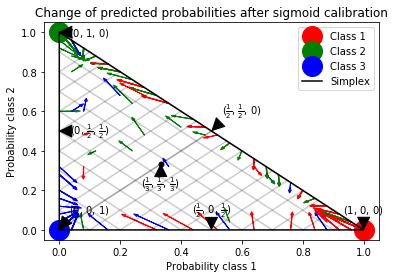

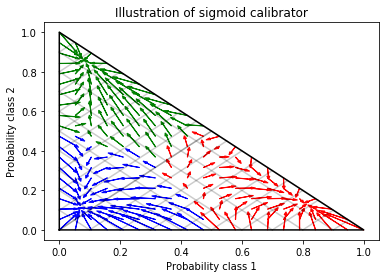

In [48]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

%matplotlib inline

np.random.seed(0)

# Generate data
X, y = make_blobs(n_samples=1000, random_state=42, cluster_std=5.0)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:800], y[600:800]
X_train_valid, y_train_valid = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)

# Train random forest classifier, calibrate on validation data and evaluate
# on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(X_valid, y_valid)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(y_test, sig_clf_probs)

# Plot changes in predicted probabilities via arrows
plt.figure()
colors = ["r", "g", "b"]
for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i, 0], clf_probs[i, 1],
              sig_clf_probs[i, 0] - clf_probs[i, 0],
              sig_clf_probs[i, 1] - clf_probs[i, 1],
              color=colors[y_test[i]], head_width=1e-2)

# Plot perfect predictions
plt.plot([1.0], [0.0], 'ro', ms=20, label="Class 1")
plt.plot([0.0], [1.0], 'go', ms=20, label="Class 2")
plt.plot([0.0], [0.0], 'bo', ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

# Annotate points on the simplex
plt.annotate(r'($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)',
             xy=(1.0/3, 1.0/3), xytext=(1.0/3, .23), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $0$, $\frac{1}{2}$)',
             xy=(.5, .0), xytext=(.5, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)',
             xy=(.0, .5), xytext=(.1, .5), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)',
             xy=(.5, .5), xytext=(.6, .6), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)',
             xy=(0, 0), xytext=(.1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)',
             xy=(1, 0), xytext=(1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)',
             xy=(0, 1), xytext=(.1, 1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
# Add grid
plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Change of predicted probabilities after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc="best")

print("Log-loss of")
print(" * uncalibrated classifier trained on 800 datapoints: %.3f "
      % score)
print(" * classifier trained on 600 datapoints and calibrated on "
      "200 datapoint: %.3f" % sig_score)

# Illustrate calibrator
plt.figure()
# generate grid over 2-simplex
p1d = np.linspace(0, 1, 20)
p0, p1 = np.meshgrid(p1d, p1d)
p2 = 1 - p0 - p1
p = np.c_[p0.ravel(), p1.ravel(), p2.ravel()]
p = p[p[:, 2] >= 0]

calibrated_classifier = sig_clf.calibrated_classifiers_[0]
prediction = np.vstack([calibrator.predict(this_p)
                        for calibrator, this_p in
                        zip(calibrated_classifier.calibrators_, p.T)]).T
prediction /= prediction.sum(axis=1)[:, None]

# Plot modifications of calibrator
for i in range(prediction.shape[0]):
    plt.arrow(p[i, 0], p[i, 1],
              prediction[i, 0] - p[i, 0], prediction[i, 1] - p[i, 1],
              head_width=1e-2, color=colors[np.argmax(p[i])])
# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Illustration of sigmoid calibrator")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.show()

In [49]:
clf_probs

array([[0.  , 0.  , 1.  ],
       [0.8 , 0.2 , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.08, 0.92, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.08, 0.92, 0.  ],
       [0.2 , 0.8 , 0.  ],
       [0.  , 0.16, 0.84],
       [0.2 , 0.8 , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.68, 0.32, 0.  ],
       [0.  , 0.28, 0.72],
       [0.08, 0.48, 0.44],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.8 , 0.2 , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.76, 0.24, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.24, 0.4 , 0.36],
       [0.  , 0.  , 1.  ],
       [0.88, 0.08, 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.68, 0.32, 0.  ],
       [0.56, 0.  , 0.44],
       [0.  , 1.  , 0.  ],
       [0.72, 0.28, 0.  ],
       [0.52, 0.  , 0.48],
 